In [43]:
#!pip install inference
#!pip install supervision
#!pip install ultralytics

from inference_sdk import InferenceHTTPClient, InferenceConfiguration
import supervision as sv
import getpass
import requests
import numpy as np
import cv2

In [33]:
API_KEY="" ## Fill your API Key

def get_roboflow_api_key():
    if API_KEY is None:
        api_key = getpass.getpass("Roboflow API Key:")
    else:
        api_key = API_KEY
    return api_key

def load_image_from_url(url):
    # Send a GET request to the URL
    response = requests.get(url)

    # Ensure that the request was successful
    if response.status_code == 200:
        # Convert the response content into a numpy array
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

        # Decode the image array into an OpenCV image
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

        return image
    else:
        print(f"Failed to retrieve the image. HTTP status code: {response.status_code}")
        return None

In [44]:
api_key = get_roboflow_api_key()

In [50]:
image_url = (
    "https://storage.googleapis.com/com-roboflow-marketing/inference/soccer2.jpg"
    )

model = get_model(
    model_id="soccer-players-5fuqs/1",
    api_key=api_key
)

In [51]:
result = model.infer(image_url)[0]

SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.


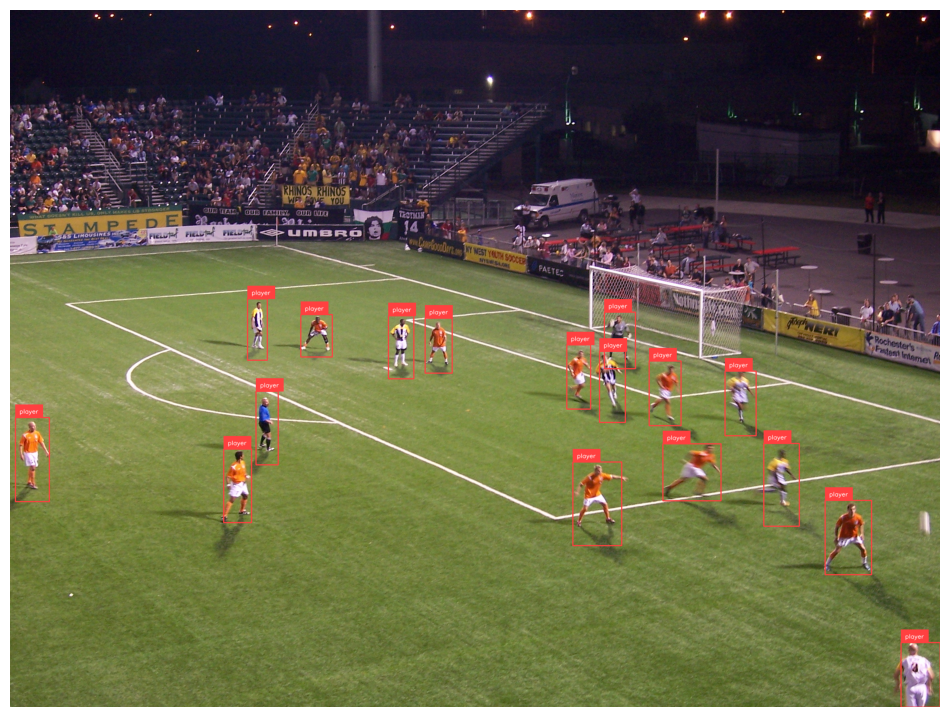

In [52]:
#Load detections from Roboflow
detections = sv.Detections.from_roboflow(result.dict(by_alias=True, exclude_none=True))

#Initialize annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

#Get class labels from inference results
labels = [p.class_name for p in result.predictions]

#Load image from url as numpy array
image = load_image_from_url(image_url)

#Annotate image
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

#Display annotations
sv.plot_image(annotated_image)